# Income EDA

## Imports

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
df = pd.read_csv('adult_income.csv')

In [3]:
print(df.shape)

(48842, 15)


In [4]:
df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
6005,24,Private,300584,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
12487,50,Private,195844,Doctorate,16,Never-married,Exec-managerial,Not-in-family,White,Male,13550,0,50,United-States,>50K
10301,49,Self-emp-not-inc,285858,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
1995,35,Private,237943,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
21442,32,Private,194987,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,<=50K


## Data Cleanig

### Missing Values

In [5]:
### Replace `?` in  ['workclass', 'occupation', 'native-country'] with most common attribute
clean_columns = ['workclass', 'occupation', 'native-country', 'marital-status']

for col in clean_columns:
    most_freq_attrib = df[col].mode()[0]
    df[col].replace('?', most_freq_attrib)

### Feature Engineering

In [6]:
# Feature Engineer Income
print(df['income'].unique())

['<=50K' '>50K']


In [7]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [8]:
df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7866,61,Private,353031,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,0
45773,25,Self-emp-inc,133373,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,80,United-States,0
1612,20,?,123536,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,40,United-States,0
34405,32,Private,328060,9th,5,Separated,Other-service,Unmarried,Other,Female,0,0,40,Mexico,0
5954,37,Private,285637,HS-grad,9,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,50,United-States,0


# EDA

### Summary Stats

In [9]:
df.drop(['income'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Age Distribution

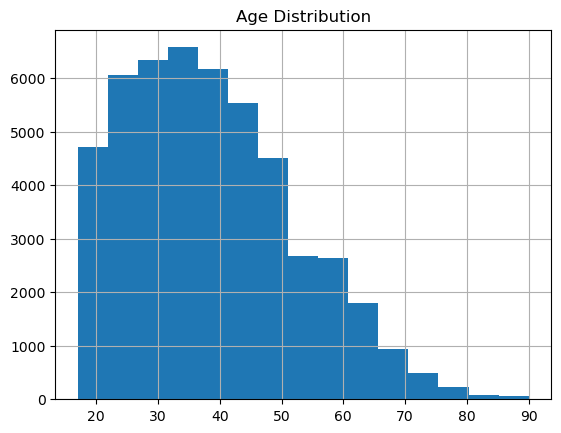

In [10]:
df['age'].hist(bins = 15)
plt.title('Age Distribution')
plt.show()

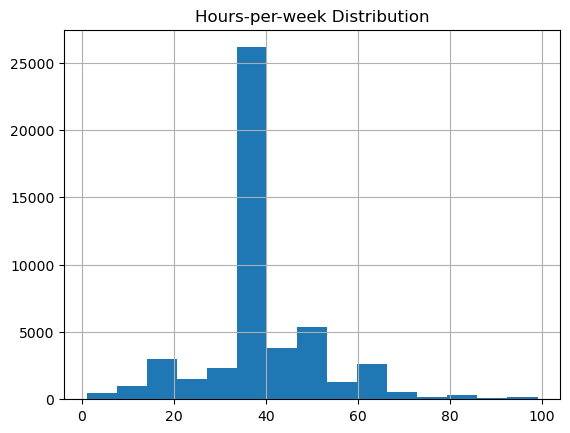

In [11]:
df['hours-per-week'].hist(bins = 15)
plt.title('Hours-per-week Distribution')
plt.show()

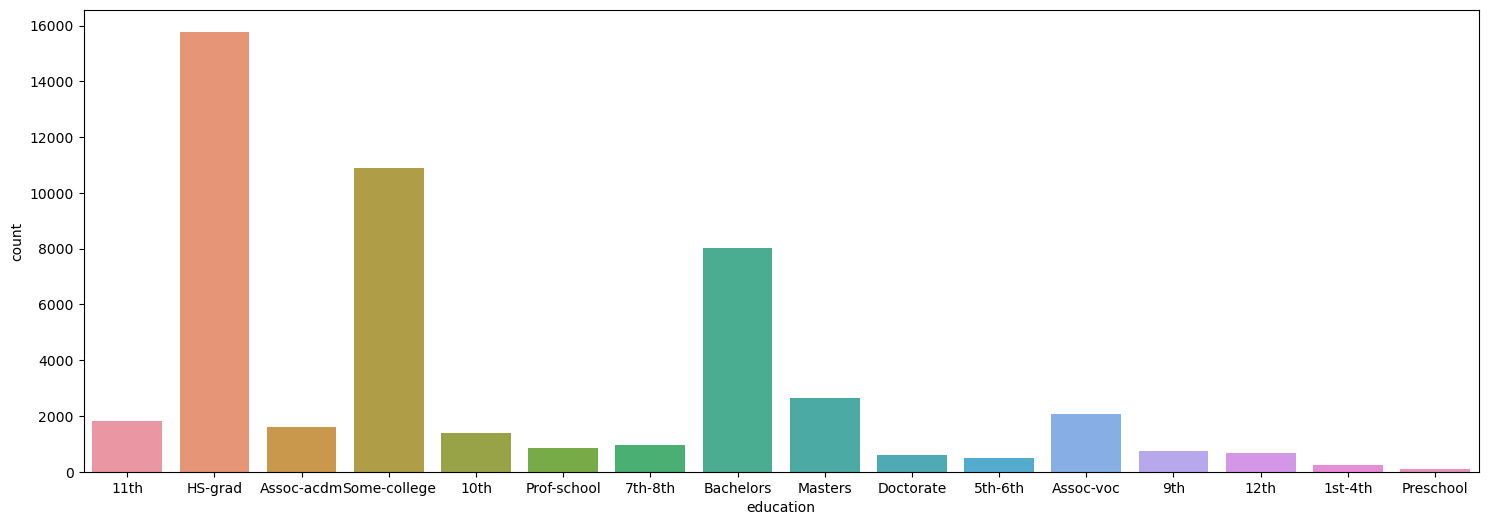

In [12]:
plt.figure(figsize=(18,6))
sns.countplot(x='education', data=df)
plt.show()

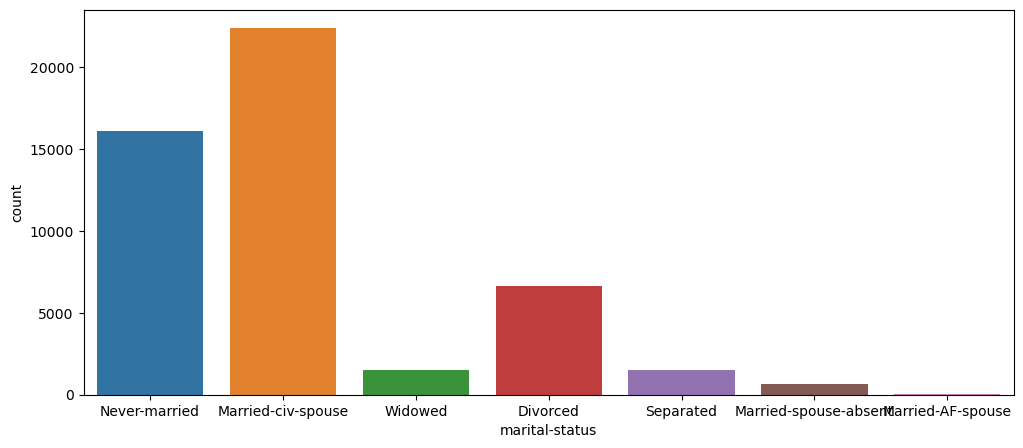

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x="marital-status", data=df)
plt.show()

### Gender Share

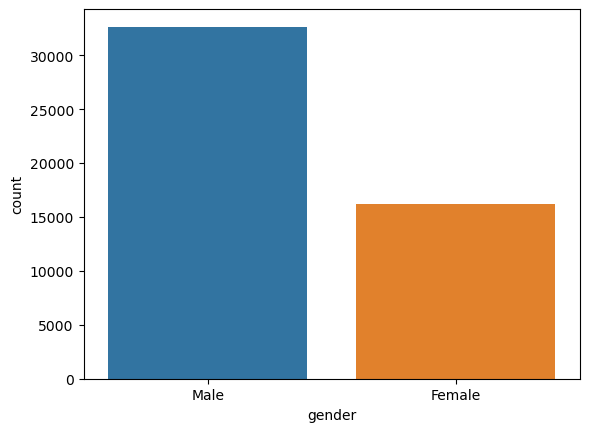

In [14]:
sns.countplot(data=df,
             x = 'gender',
             orient ="v")
plt.show()

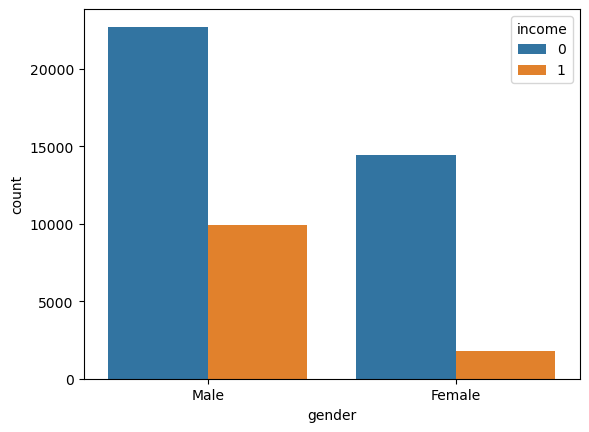

In [15]:
sns.countplot(data=df,
             x = 'gender',
             hue = 'income')
plt.show()

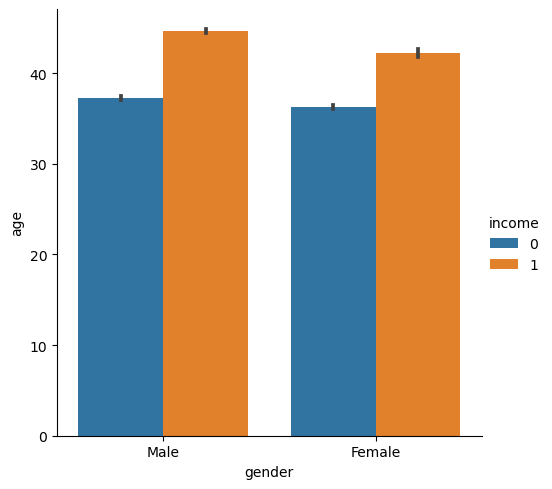

In [16]:
sns.catplot(data=df,
            y = 'age',
            x = 'gender',
            hue = 'income',
            kind="bar")
plt.show()

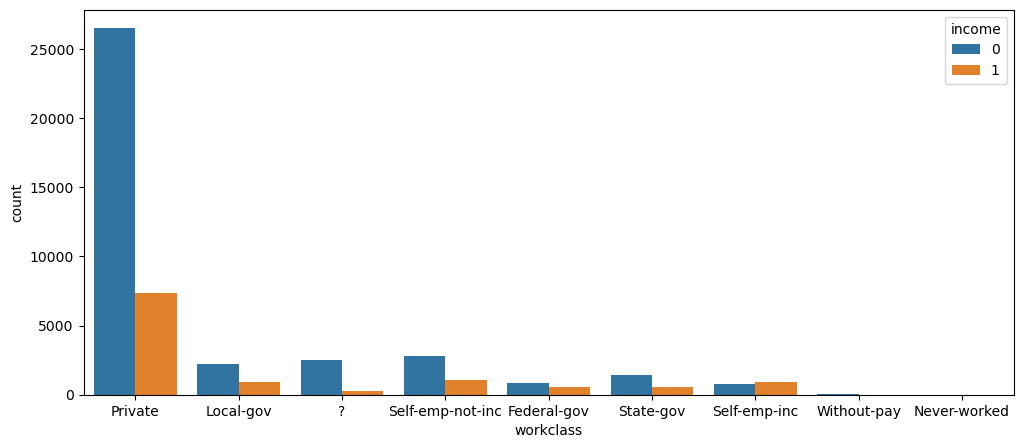

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,
           x = 'workclass',
           hue = 'income')
plt.show()

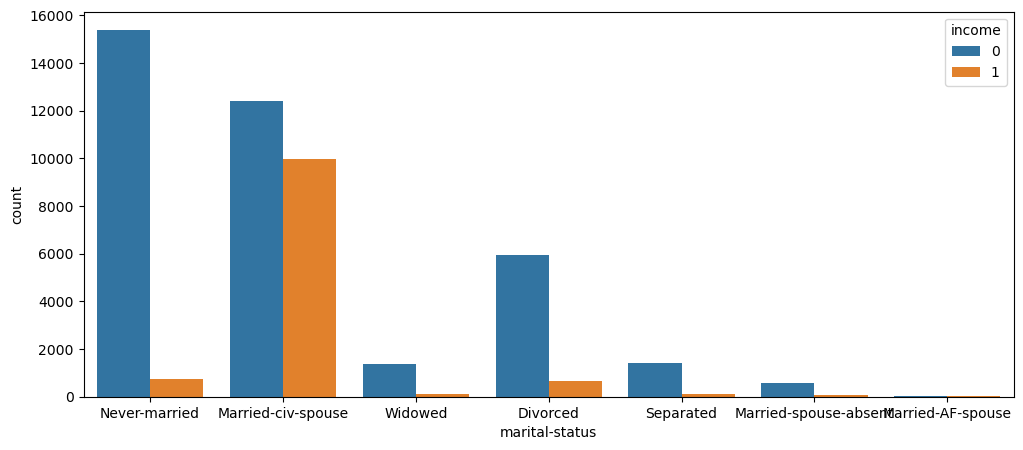

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x="marital-status", hue="income", data=df)
plt.show()

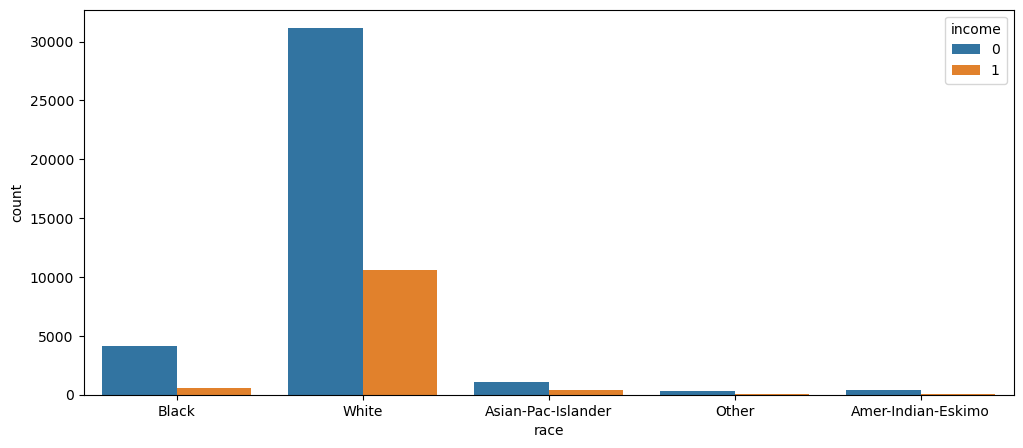

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x="race", hue="income", data=df)
plt.show()

In [77]:
df_race = df.loc[(df['race'] == 'Black') | (df['race'] == 'White')]

In [62]:
def jitter(values,j):
    return values + np.random.normal(j, 1, values.shape)

<Figure size 1000x1000 with 0 Axes>

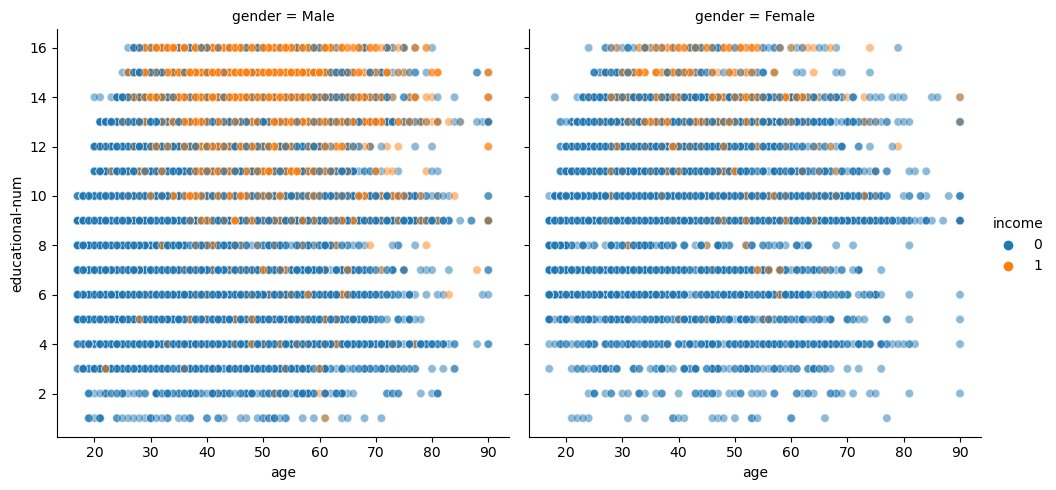

In [78]:
plt.figure(figsize=(10,10))
sns.relplot(x = 'age',
    y='educational-num',
    data=df,
    kind="scatter",
    col="gender",
    hue='income',
    alpha = 0.5)
    
plt.show()

<Figure size 1000x1000 with 0 Axes>

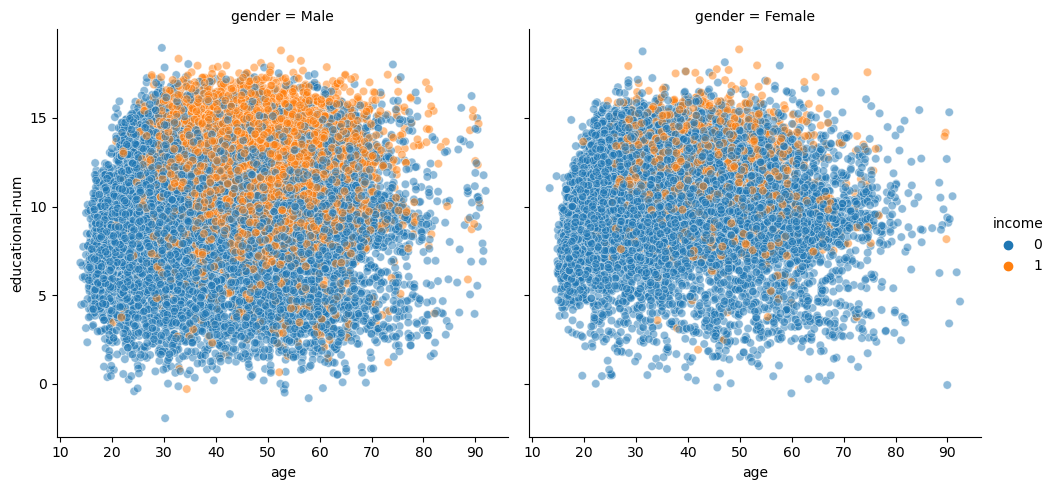

In [79]:
plt.figure(figsize=(10,10))
sns.relplot(x = jitter(df['age'],0),
    y=jitter(df['educational-num'],0),
    data=df,
    kind="scatter",
    col="gender",
    hue='income',
    alpha = 0.5)
    
plt.show()

<Figure size 500x500 with 0 Axes>

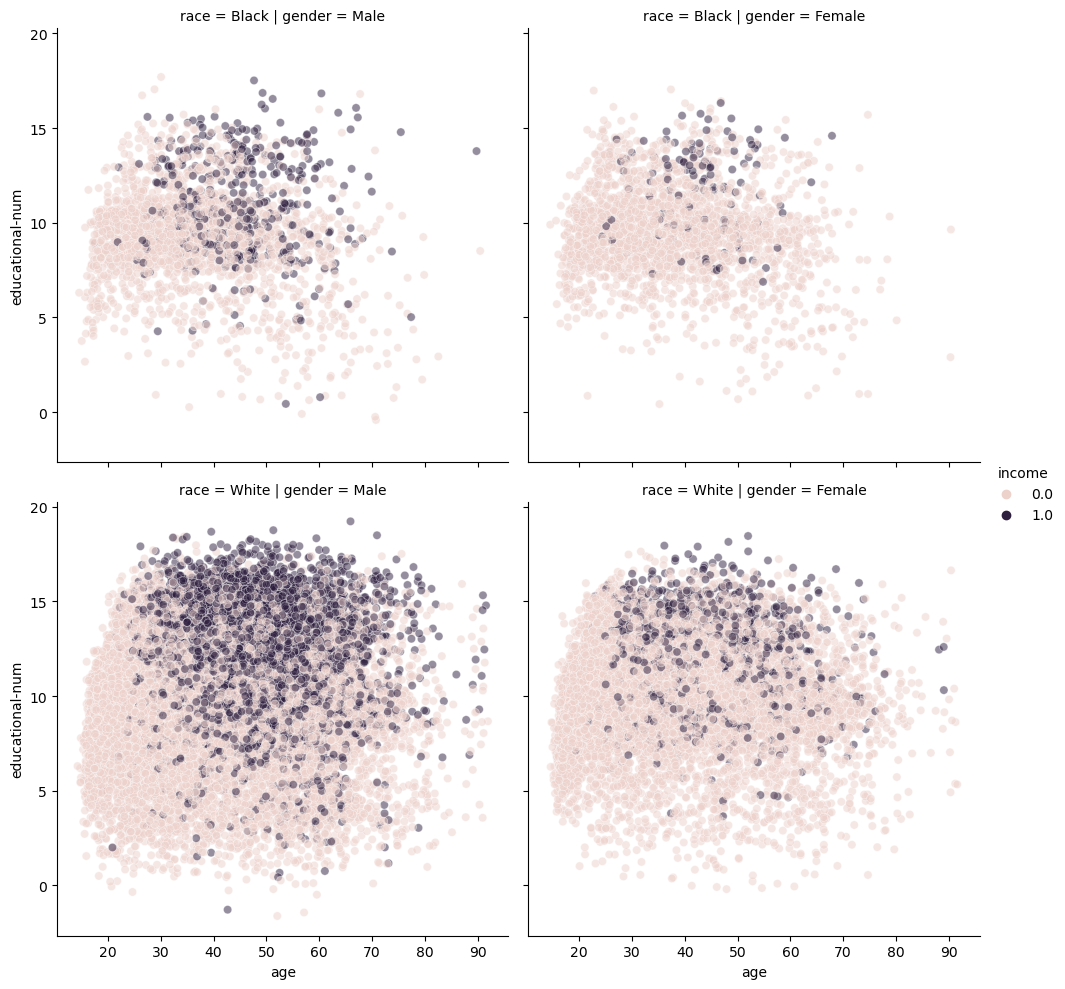

In [82]:
plt.figure(figsize=(5,5))
sns.relplot(x = jitter(df['age'],0),
    y=jitter(df['educational-num'],0),
    data=df_race,
    kind="scatter",
    hue='income',
    alpha=0.5,
    col='gender',
    row="race",)
    
plt.show()

In [20]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [21]:
df_numeric_sample = df[['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'income']].sample(1000)

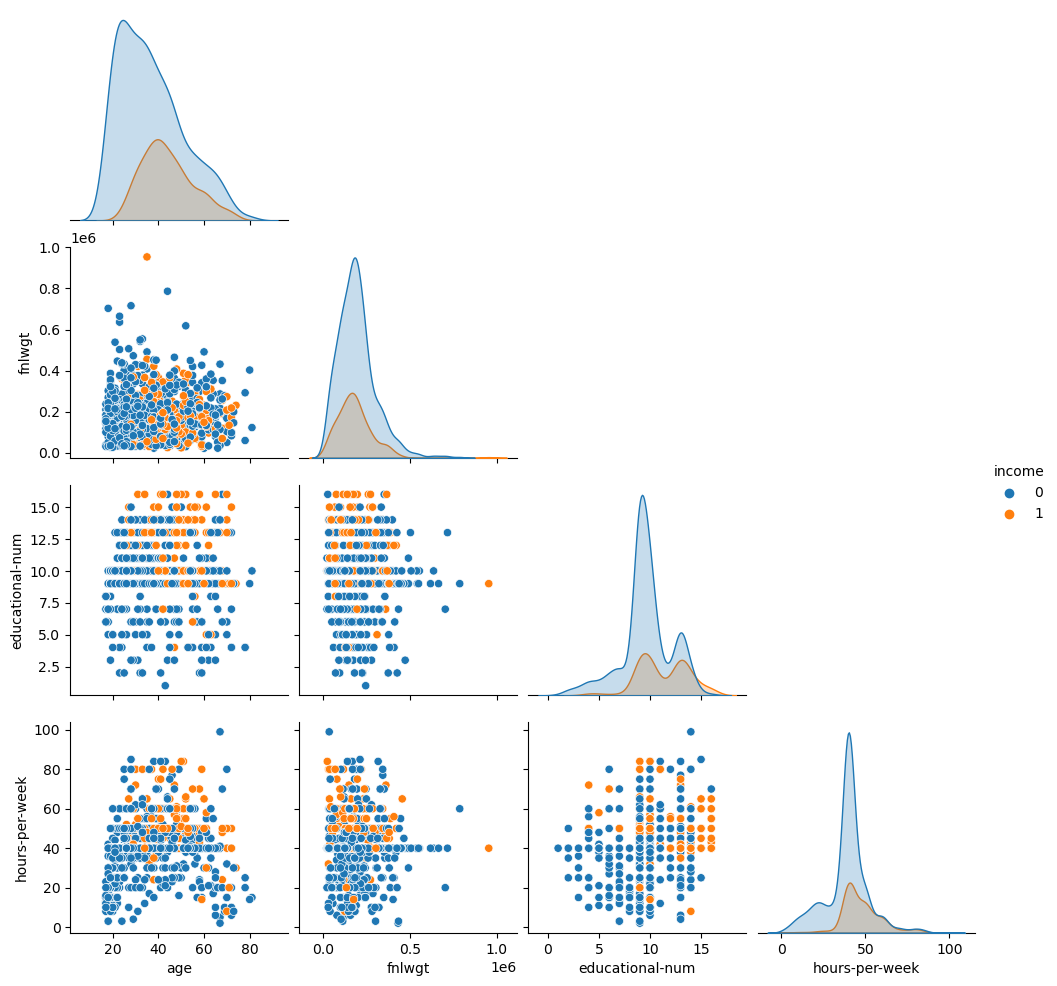

In [22]:
sns.pairplot(data=df_numeric_sample,
             hue='income',
             corner=True)
plt.show()

In [ ]:
seaborn.heatmap(